In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go

In [108]:
def convert_to_category(df):
    # Iterate over each column in the dataframe
    for col in df.columns:
        # Check if the data type of the column is 'object' (typically used for text/string data)
        if (df[col].dtype == 'object') and (df[col].unique().shape[0] < df.index.shape[0]/2):
            df[col] = df[col].astype('category')
    return df

def get_dummies_from_categorical(df, append=False):
    cat_cols = df.select_dtypes('category').columns
    if append:
        return pd.concat([df,pd.get_dummies(df[cat_cols]).astype('bool')], axis=1)
    
    return pd.get_dummies(df[cat_cols].astype('bool'))

def remove_by_z_score(df,n_std=3):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    z_scores = zscore(numeric_cols)        
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < n_std).all(axis=1)
    
    print(numeric_cols.shape[0] - filtered_entries.shape[0], 'ouliers removed')
    
    new_df = df[filtered_entries]
    return new_df

In [109]:
df = pd.read_csv('EXR.csv', sep=';')

df = convert_to_category(df)
df = remove_by_z_score(df)

onehot = get_dummies_from_categorical(df, append=False)

df.info()

0 ouliers removed
<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   FREQ                  195 non-null    category
 1   Frekvens              195 non-null    category
 2   BASE_CUR              195 non-null    category
 3   Basisvaluta           195 non-null    category
 4   QUOTE_CUR             195 non-null    category
 5   Kvoteringsvaluta      195 non-null    category
 6   TENOR                 195 non-null    category
 7   Løpetid               195 non-null    category
 8   DECIMALS              195 non-null    int64   
 9   CALCULATED            195 non-null    bool    
 10  UNIT_MULT             195 non-null    int64   
 11  Multiplikator         195 non-null    category
 12  COLLECTION            195 non-null    category
 13  Innsamlingstidspunkt  195 non-null    category
 14  TIME_PERIOD           195 non-null    ca

# Summary statistrics

In [110]:
df.describe()

,DECIMALS,UNIT_MULT
count,195.000000,195.000000
mean,3.307692,1.128205
std,1.019244,0.994300
min,2.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,2.000000
75%,4.000000,2.000000
max,6.000000,2.000000


In [111]:
cat_cols = df.select_dtypes('category').columns
for i in cat_cols:
    print(df[i].value_counts())

B    195
Name: FREQ, dtype: int64
Virkedag    195
Name: Frekvens, dtype: int64
AUD    5
SEK    5
MXN    5
MYR    5
NZD    5
PHP    5
PKR    5
PLN    5
RON    5
SGD    5
KRW    5
THB    5
TRY    5
TWD    5
TWI    5
USD    5
VND    5
XDR    5
MMK    5
JPY    5
BDT    5
DKK    5
BGN    5
BRL    5
BYN    5
CAD    5
CHF    5
CNY    5
CZK    5
EUR    5
ISK    5
GBP    5
HKD    5
HUF    5
I44    5
IDR    5
ILS    5
INR    5
ZAR    5
Name: BASE_CUR, dtype: int64
Amerikanske dollar                  5
Singapore dollar                    5
Myanmar kyat                        5
New Zealand dollar                  5
Ny israelsk shekel                  5
Ny rumenske leu                     5
Nye taiwanske dollar                5
Pakistanske rupi                    5
Polske zloty                        5
Sveitsiske franc                    5
Malaysiske ringgit                  5
Svenske kroner                      5
Sørafrikanske rand                  5
Sørkoreanske won                    5
Thailands

In [112]:
df.head()

,FREQ,Frekvens,BASE_CUR,Basisvaluta,QUOTE_CUR,Kvoteringsvaluta,TENOR,Løpetid,DECIMALS,CALCULATED,UNIT_MULT,Multiplikator,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE
0,B,Virkedag,HUF,Ungarske forinter,NOK,Norske kroner,SP,Spot,4,False,2,Hundre,C,ECB concertation tidspunkt 14:15 CET,2023-05-26,"3,1812"
1,B,Virkedag,HUF,Ungarske forinter,NOK,Norske kroner,SP,Spot,4,False,2,Hundre,C,ECB concertation tidspunkt 14:15 CET,2023-05-30,"3,2059"
2,B,Virkedag,HUF,Ungarske forinter,NOK,Norske kroner,SP,Spot,4,False,2,Hundre,C,ECB concertation tidspunkt 14:15 CET,2023-05-31,"3,237"
3,B,Virkedag,HUF,Ungarske forinter,NOK,Norske kroner,SP,Spot,4,False,2,Hundre,C,ECB concertation tidspunkt 14:15 CET,2023-06-01,"3,2307"
4,B,Virkedag,HUF,Ungarske forinter,NOK,Norske kroner,SP,Spot,4,False,2,Hundre,C,ECB concertation tidspunkt 14:15 CET,2023-06-02,"3,1896"


# Violin plots of numeric cols

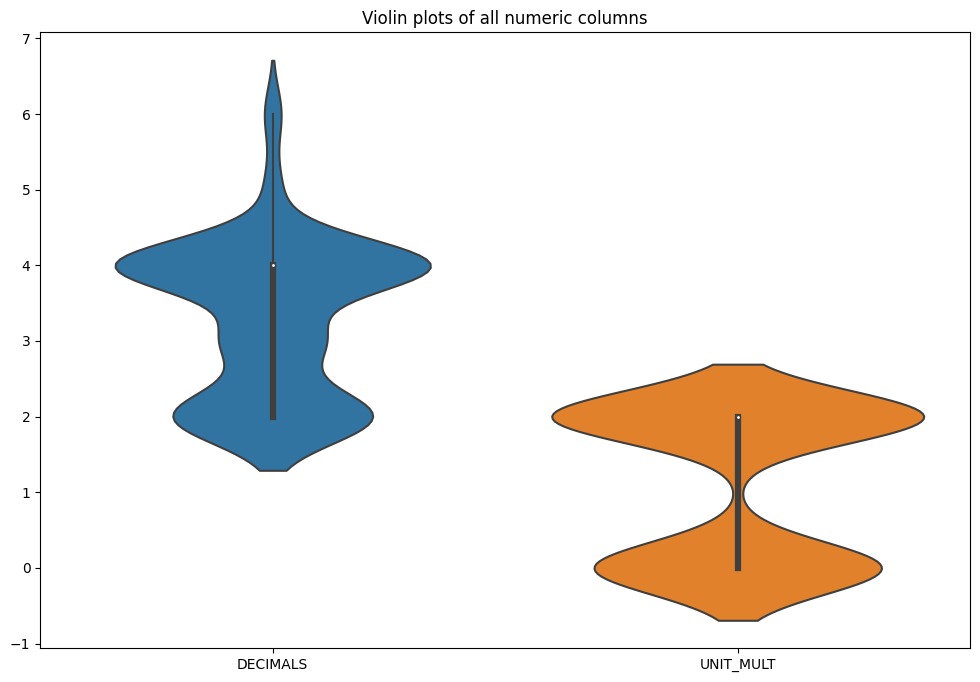

In [113]:
# Ensure that the columns are of numeric type
numeric_cols = df.select_dtypes('number').columns

# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[numeric_cols])
plt.title('Violin plots of all numeric columns')
plt.show()

<__array_function__ internals>:200: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



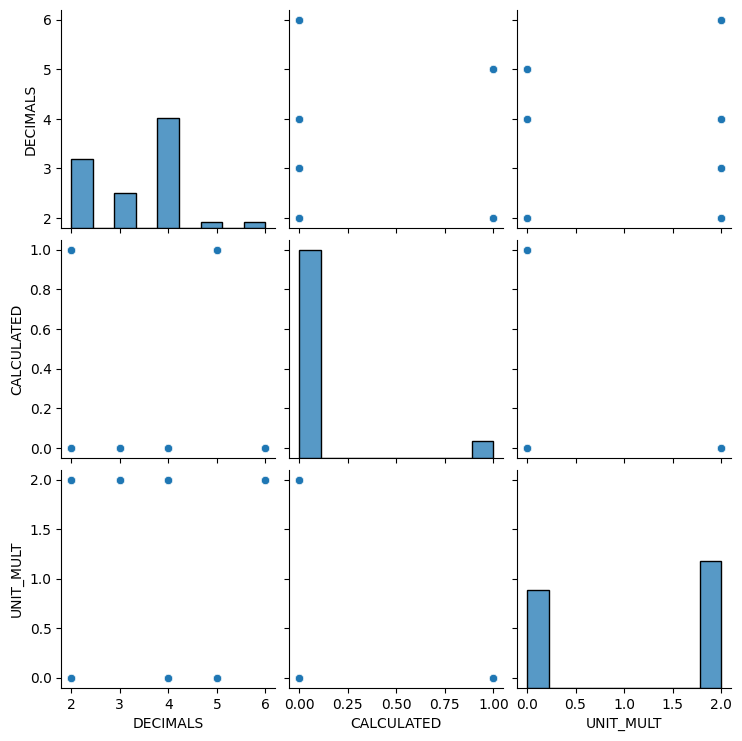

In [149]:
sns.pairplot(df) #, hue='Basisvaluta')
plt.show()

# Sample correlation matrix

In [ ]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

# Scaling and PCA

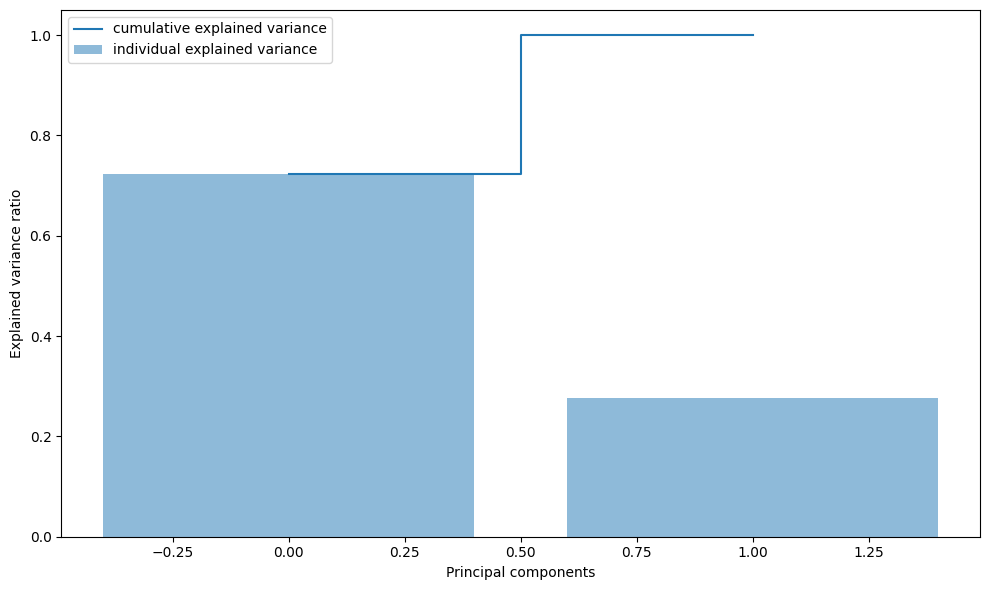

In [130]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df[numeric_cols])

pca = PCA()
T = pca.fit_transform(df_num_scaled)

plt.figure(figsize=(10,6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [143]:
# Plot the 3D data
fig = px.scatter_3d(x=T[:,0], y=T[:,1], z=T[:,1],color=df['Basisvaluta'])
# Show the plot
fig.show()

In [144]:
# Create the scatter plot for the data
fig = px.scatter_3d(x=T[:, 0], y=T[:, 1], z=T[:, 1], color=df['Basisvaluta'])

# Add the loadings (vectors) to the plot
for i, feature in enumerate(df.drop(columns='Basisvaluta').columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, loadings[i, 0]],
            y=[0, loadings[i, 1]],
            z=[0, loadings[i, 2]],
            mode='lines+text',
            name=feature,
            text=[None, feature],
            textposition='top center'
        )
    )

fig.show()


NameError: name 'loadings' is not defined

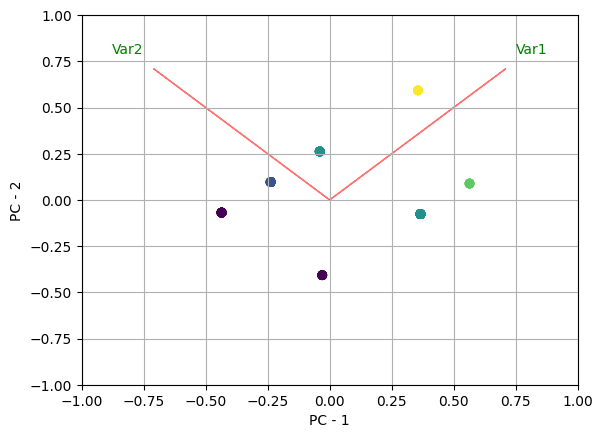

In [145]:
def biplot(score,coeff,y,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC - {}".format(1))
    plt.ylabel("PC - {}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
biplot(T[:,0:2],np.transpose(pca.components_[0:2, :]), df['DECIMALS'])
plt.show()

# Model and prediction?